In [13]:
import csv
import numpy as np
"""
找出所有数据标签以及数据标签的具体分类
    0.图片名 pic_name
    1.花纹 texture
    2.图案 patterns
    3.是否合身 types
    4.装饰 crafts
    5.裤子外形 contours
    6.裤脚 hems
    7.衣领 collars
    8.袖子长度 sleeve
    9.裤子长度 pant_lengths
    10.衣服长度 coat_lengths
    11.子类型长度 skirt
    12.上衣外形 upper_dress_contours
    13.衣服风格 styles
    14.袖子风格 sleeve_types
    15.口袋风格 plackets
    16.服装种类 kinds
    17.材质 fabrices
    18.人朝向 orientations
    19.颜色 colors_2
"""
with open('collocation.csv', 'r') as f:
    reader = csv.reader(f)
    count = [dict() for i in range(20)]
    total_data = []
    label=0
    for row in reader:#不读取第一行数据
        if label == 0:
            label = 1
            continue  
        total_data.append(row)
        for i in range(20):
            count[i].setdefault(row[i],0)
            count[i][row[i]] += 1
total_data = np.asarray(sorted(total_data))
print(len(total_data))
print()
print(total_data[0])
print()
for i in range(20-1):
    print(count[i+1])













12082

['00076141ba9c3aacdbd3b8f2e1.jpg' '纯色' ' 文字' '合身' ' 印花' '直筒裤' '常规' '圆领'
 '短袖' '七分裤' '常规' '短裙' 'H型' ' 休闲 运动 街头' '常规袖' '套头' 'T恤' '棉麻' '正面' '绿']

{'格纹': 236, '纯色': 9215, '拼色': 1400, '条纹': 690, '动物花纹': 217, '迷彩纹': 79, '几何花纹': 34, '波点纹': 70, '波浪纹': 7, '植物花纹': 122, '蛇皮纹': 8, '斑马纹': 2, '豹纹': 1, '': 1}
{' 无图案': 7922, ' 图形': 99, ' 文字': 2787, ' 卡通动漫': 77, ' 文字 艺术效果': 169, ' 文字 生活': 20, ' 文字 卡通动漫': 104, ' 艺术效果': 288, ' 图形 文字': 175, ' 植物花卉': 84, ' 文字 生活 艺术效果': 35, ' 植物花卉 文字 艺术效果': 10, ' 人物': 9, ' 文字 人物': 14, ' 动物': 22, ' 动物 文字 艺术效果': 22, ' 文字 艺术效果 卡通动漫': 12, ' 植物花卉 文字': 19, ' 文字 太空科技': 2, ' 生活': 9, ' 植物花卉 卡通动漫': 3, ' 动物 文字 卡通动漫': 5, ' 人物 艺术效果': 4, ' 文字 人物 艺术效果': 25, ' 文字 人体结构 艺术效果': 3, ' 植物花卉 自然': 1, ' 文字 太空科技 艺术效果': 5, ' 图形 卡通动漫': 5, ' 文字 自然 艺术效果': 5, ' 文字 人体结构': 6, ' 文字 生活 卡通动漫': 7, ' 动物 文字': 28, ' 图形 文字 生活': 3, ' 动物 图形 文字 卡通动漫': 2, ' 图形 星型 文字 卡通动漫': 1, ' 文字 人物 生活 艺术效果': 2, ' 图形 文字 艺术效果': 9, ' 文字 运动 艺术效果': 3, ' 艺术效果 卡通动漫': 2, ' 植物花卉 艺术效果': 2, ' 人体结构': 2, ' 植物花卉 文字 人体结构 艺术效果': 1, ' 动物 艺术效果

In [25]:
"""数据清洗，洗去只有一件衣物或检查出2件同为衣服/裤子的数据"""    

print(count[-4])#找出所有衣服的类别

clothes = [ '卫衣','T恤', '针织衫', '毛衣','夹克',
           '衬衫', '羽绒服', '棉衣', '毛呢外套','Polo衫', '打底衫',
           '雪纺衫(蕾丝衫)', '西服(西装)','大衣(风衣)' ,'抹胸',
           '背心(吊带)', '马甲', '皮草', '皮衣','披肩(斗篷)']

pants = ['休闲裤', '半身裙', '牛仔裤', '西裤', '短裤', '打底裤',
         '皮裙', '阔腿裤', '连体裤', '皮裤']


pic_same_up_down = {}
label=0
for row in total_data:#不读取第一行数据
    if label == 0:
        label = 1
        continue  
    if row[16] in clothes:
        pic_same_up_down.setdefault(row[0],0)
        pic_same_up_down[row[0]] += 4
    elif row[16] in pants:
        pic_same_up_down.setdefault(row[0],0)
        pic_same_up_down[row[0]] += 3
errors = filter(lambda x:7!= x[1], pic_same_up_down.items())
error_list = []
for (key,value) in errors:
    error_list.append(key)
print(len(error_list))
print(error_list)

filted_data = filter(lambda x:x[0] not in error_list, total_data)
new_data = []
for data in filted_data:
    new_data.append(data)
print(len(new_data))
for i in range(100):
    print(new_data[i])

{'休闲裤': 1426, '披肩(斗篷)': 4, 'T恤': 1881, '短裤': 1722, '牛仔裤': 1835, '针织衫': 383, '卫衣': 1045, '羽绒服': 317, '衬衫': 515, 'Polo衫': 181, '皮裙': 14, '打底裤': 55, '大衣(风衣)': 67, '毛衣': 194, '半身裙': 310, '夹克': 434, '背心(吊带)': 77, '打底衫': 137, '棉衣': 104, '西裤': 145, '皮衣': 16, '雪纺衫(蕾丝衫)': 142, '抹胸': 25, '阔腿裤': 82, '马甲': 30, '西服(西装)': 24, '毛呢外套': 21, '连体裤': 10, '皮草': 4, '礼服(婚纱)': 1, '皮裤': 2, '连衣裙': 4}
410
['00076141ba9c3aacdbd3b8f2e1.jpg', '00928643e796098f0199f2d044.jpg', '027dd1489f87bb2bd6313289bd.jpg', '0446184b408d6c5e572886179d.jpg', '0502a84cfe9e4bc041c66e1e89.jpg', '05c97443abafcd616884f31c9f.jpg', '06c06d4b2b9b58e7648c02dcdb.jpg', '06e3e1441fa1b4214ae5aba10f.jpg', '07368e4cb4ac275dba402e09a2.jpg', '07e74d48adba44af4be8a2114d.jpg', '0886e14984abd40a231503a4c5.jpg', '0888bd4e0f9df850581fcf69e4.jpg', '08a6cf4889a7ac18f939ddc828.jpg', '0b331f4c94bf132443aea6a7a8.jpg', '0ba2ec4088a4774cf5febbad00.jpg', '0c02cb400886dab464f7f5ce69.jpg', '0d9b144c578be3db3662ae9bdc.jpg', '0dd5964263b16f68c50825a21f.jpg', '0f74

In [26]:
"""统计清洗之后的数据"""
new_count = [dict() for i in range(20)]
for data in new_data:
    for i in range(20):
        new_count[i].setdefault(data[i],0)
        new_count[i][data[i]] += 1
count = new_count
for i in range(20-1):
    print(count[i+1])


{'纯色': 8623, '条纹': 627, '动物花纹': 210, '格纹': 215, '拼色': 1240, '植物花纹': 115, '波点纹': 64, '迷彩纹': 71, '波浪纹': 7, '几何花纹': 32, '蛇皮纹': 7, '斑马纹': 2, '豹纹': 1, '': 1}
{' 无图案': 7294, ' 文字 卡通动漫': 97, ' 文字 艺术效果': 167, ' 文字 运动 艺术效果': 3, ' 文字': 2605, ' 图形 文字': 164, ' 植物花卉': 79, ' 艺术效果': 278, ' 卡通动漫': 74, ' 图形': 94, ' 植物花卉 卡通动漫': 3, ' 文字 生活 艺术效果': 35, ' 植物花卉 文字': 19, ' 动物 文字 艺术效果': 21, ' 图形 艺术效果': 5, ' 文字 人体结构 艺术效果': 3, ' 文字 人物': 14, ' 文字 人物 艺术效果': 23, ' 人体结构': 2, ' 动物 图形 文字 卡通动漫': 2, ' 动物 文字': 28, ' 图形 卡通动漫': 5, ' 文字 生活': 18, ' 文字 人体结构': 6, ' 动物 生活 卡通动漫': 1, ' 动物': 20, ' 图形 文字 卡通动漫': 3, ' 生活': 9, ' 文字 人物 生活': 2, ' 图形 星型 太空科技 艺术效果': 1, ' 文字 人体结构 卡通动漫': 1, ' 图形 文字 生活': 3, ' 文字 人物 生活 艺术效果': 2, ' 生活 卡通动漫': 2, ' 人物': 9, ' 文字 运动': 2, ' 生活 艺术效果': 4, ' 植物花卉 文字 艺术效果': 10, ' 图形 文字 艺术效果': 9, ' 艺术效果 卡通动漫': 2, ' 图形 星型 文字': 1, ' 文字 太空科技 艺术效果': 4, ' 植物花卉 图形 文字': 2, ' 图形 文字 生活 艺术效果': 2, ' 文字 生活 卡通动漫': 5, ' 文字 艺术效果 卡通动漫': 10, ' 文字 自然 艺术效果': 5, ' 文字 自然': 4, ' 太空科技 艺术效果': 2, ' 动物 艺术效果': 9, ' 图形 星型 文字 太空科技 艺术效果': 1, ' 文字 太空

{'黑': 3809, '灰': 2465, '蓝': 2135, '白': 816, '红': 471, '绿': 117, '蓝紫': 194, '卡其': 296, '橙红': 89, '橙': 165, '蓝绿': 225, '黄绿': 59, '紫': 107, '黄': 48, '紫红': 69, '橙黄': 109, '': 41}
17
['黑', '灰', '蓝', '白', '红', '绿', '蓝紫', '卡其', '橙红', '橙', '蓝绿', '黄绿', '紫', '黄', '紫红', '橙黄', '']
5601
5601
[[582. 233. 368.  30.  13.  10.  28.  65.  12.  21.  40.   5.   2.   0.
    0.   5.   2.]
 [762. 190. 531.  15.  18.  17.  26.  63.   5.  17.  44.   7.   3.   1.
    5.   3.   0.]
 [198.  84. 129.  20.   1.   1.  10.  23.   3.   7.  15.   0.   0.   0.
    0.   1.   0.]
 [261.  87. 267.   8.   8.   9.  21.  17.   5.   9.  19.   4.   6.   1.
    0.   3.   2.]
 [204.  42. 131.   7.   3.   0.   6.   8.   0.   3.  14.   0.   0.   0.
    3.   1.   0.]
 [ 34.   5.  23.   1.   0.   2.   4.   3.   0.   0.   2.   1.   0.   0.
    0.   0.   0.]
 [ 29.  10.  18.   0.   1.   0.   0.   6.   0.   1.   3.   0.   1.   0.
    0.   0.   0.]
 [ 53.   9.  24.   1.   0.   0.   3.   0.   0.   0.   2.   1.   0.   0.
    0.   0.   0.]


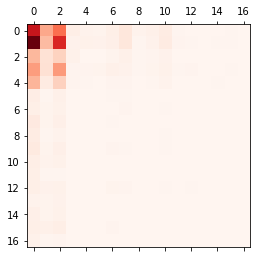

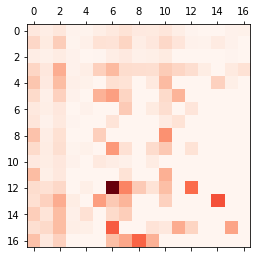

"\n0.灰\n1.黑\n2.白\n3.蓝\n4.蓝绿\n5.紫\n6.紫红\n7.卡其\n8.红\n9.蓝紫\n10.绿\n11.橙红\n12.橙黄\n13.橙\n14.黄绿\n15.黄\n16.''\n纵向衣服颜色，横向裤子颜色\n"

In [50]:
"""分析上下颜色搭配"""
import matplotlib.pyplot as plt
print(count[-1])#找出所有衣服的颜色
print(len(count[-1]))

colors = []
for key in count[-1]:
    colors.append(key)
print(colors)

clothes_color = []
pants_color = []
for data in new_data:
    if (data[-4] in clothes):
        clothes_color.append(colors.index(data[-1]))
    elif (data[-4] in pants):
        pants_color.append(colors.index(data[-1]))
                
assert (len(clothes_color)==len(pants_color))
print(len(clothes_color))
print(len(pants_color))

#总体颜色分布
color_matrix = np.zeros((len(colors),len(colors)),dtype = np.float32)
for i in range(len(clothes_color)):
    color_matrix[clothes_color[i]][pants_color[i]]+=1
print(color_matrix)

#颜色搭配契合度
color_matrix2 = np.zeros((len(colors),len(colors)),dtype = np.float32)
for i in range(len(clothes_color)):
    color_matrix2[clothes_color[i]][pants_color[i]]+=1/((count[-1][colors[pants_color[i]]])*(count[-1][colors[clothes_color[i]]]))
print(color_matrix2)

plt.matshow(color_matrix,cmap=plt.cm.Reds)
plt.matshow(color_matrix2,cmap=plt.cm.Reds)
plt.show()

"""
0.灰
1.黑
2.白
3.蓝
4.蓝绿
5.紫
6.紫红
7.卡其
8.红
9.蓝紫
10.绿
11.橙红
12.橙黄
13.橙
14.黄绿
15.黄
16.''
纵向衣服颜色，横向裤子颜色
"""

5601
5601
[[362.  71. 370.   6. 211.  11.   0.  13.   0.   1.]
 [333.  93. 509.  13. 881.   9.   2.  33.   8.   0.]
 [130.  28. 164.  11.  46.   0.   0.   4.   0.   0.]
 [ 56.  18.  77.   1.  33.   5.   1.   3.   0.   0.]
 [123.  25. 143.  18. 116.   5.   1.   1.   1.   1.]
 [112.  31. 172.  40. 148.   3.   4.   5.   0.   0.]
 [ 92.   8. 142.   5.  56.   7.   2.   5.   0.   0.]
 [ 31.   4.  39.   4.  20.   4.   1.   0.   1.   0.]
 [  3.   0.   6.   3.   3.   3.   0.   3.   0.   0.]
 [ 40.   3.  47.  10.  78.   0.   0.   3.   0.   0.]
 [ 49.   1.  51.   7.  26.   1.   1.   1.   0.   0.]
 [ 34.  21.  33.   5.  38.   2.   1.   8.   0.   0.]
 [  2.   1.   5.   9.   7.   0.   0.   0.   0.   0.]
 [ 17.   2.  35.   4.   4.   5.   0.   0.   0.   0.]
 [ 11.   0.   3.   1.  10.   0.   0.   0.   0.   0.]
 [ 18.   3.  18.   4.  32.   0.   1.   1.   0.   0.]
 [  6.   1.  14.   1.   8.   0.   0.   0.   0.   0.]
 [  0.   0.   3.   0.   0.   0.   0.   1.   0.   0.]
 [  5.   0.   3.   3.   5.   0.   0.

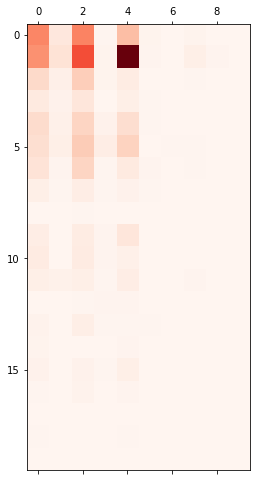

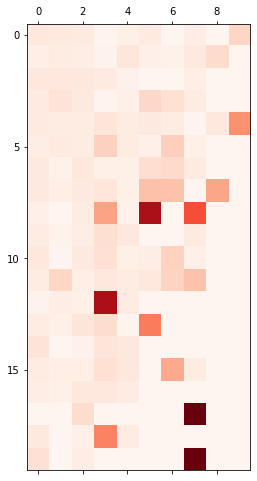

['卫衣', 'T恤', '针织衫', '毛衣', '夹克', '衬衫', '羽绒服', '棉衣', '毛呢外套', 'Polo衫', '打底衫', '雪纺衫(蕾丝衫)', '西服(西装)', '大衣(风衣)', '抹胸', '背心(吊带)', '马甲', '皮草', '皮衣', '披肩(斗篷)']
['休闲裤', '半身裙', '牛仔裤', '西裤', '短裤', '打底裤', '皮裙', '阔腿裤', '连体裤', '皮裤']


'\nclothes\n0.卫衣\n1.T恤\n2.针织衫\n3.毛衣\n4.夹克\n5.衬衫\n6.羽绒服\n7.棉衣\n8.毛呢外套\n9.Polo衫\n10.打底衫\n11.雪纺衫(蕾丝衫)\n12.西服(西装)\n13.大衣(风衣)\n14.抹胸\n15.背心(吊带)\n16.马甲\n17.皮草\n18.皮衣\n19.披肩(斗篷\n\n\npants\n0.休闲裤\n1.半身裙\n2.牛仔裤\n3.西裤\n4.短裤\n5.打底裤\n6.皮裙\n7.阔腿裤\n8.连体裤\n9.皮裤\n'

In [56]:
"""分析上下种类搭配"""



clothes_kind = []
pants_kind = []
for data in new_data:
    if (data[-4] in clothes):
        clothes_kind.append(clothes.index(data[-4]))
    elif (data[-4] in pants):
        pants_kind.append(pants.index(data[-4]))

                
assert (len(clothes_kind)==len(pants_kind))
print(len(clothes_kind))
print(len(pants_kind))

#数量
kind_matrix = np.zeros((len(clothes),len(pants)),dtype = np.float32)
for i in range(len(clothes_kind)):
    kind_matrix[clothes_kind[i]][pants_kind[i]]+=1
print(kind_matrix)

#契合度
kind_matrix2 = np.zeros((len(clothes),len(pants)),dtype = np.float32)
for i in range(len(clothes_kind)):
    kind_matrix2[clothes_kind[i]][pants_kind[i]]+=1/((count[-4][pants[pants_kind[i]]])*(count[-4][clothes[clothes_kind[i]]]))
print(kind_matrix2)

plt.matshow(kind_matrix,cmap=plt.cm.Reds)
plt.matshow(kind_matrix2,cmap=plt.cm.Reds)
plt.show()
print(clothes)
print(pants)

"""
clothes
0.卫衣
1.T恤
2.针织衫
3.毛衣
4.夹克
5.衬衫
6.羽绒服
7.棉衣
8.毛呢外套
9.Polo衫
10.打底衫
11.雪纺衫(蕾丝衫)
12.西服(西装)
13.大衣(风衣)
14.抹胸
15.背心(吊带)
16.马甲
17.皮草
18.皮衣
19.披肩(斗篷


pants
0.休闲裤
1.半身裙
2.牛仔裤
3.西裤
4.短裤
5.打底裤
6.皮裙
7.阔腿裤
8.连体裤
9.皮裤
"""

{'长袖': 5064, '短袖': 2776, '无袖': 1066, '不可见': 209, '七分袖': 425, '中袖': 1120, '超长袖': 555}
7
{'长裤': 3448, '九分裤': 4246, '短裤': 710, '五分裤': 957, '不可见': 348, '七分裤': 528, '超短裤': 978}
7
{'中裙': 2505, '短裙': 4523, '长裙': 1301, '不可见': 706, '中长裙': 1841, '超短裙': 308, '超长裙': 31}
7
5601
5601
[[1.210e+02 8.100e+01 1.200e+01 1.000e+01 1.700e+01 2.400e+01 0.000e+00
  0.000e+00 3.000e+00 0.000e+00 3.000e+01 5.000e+00 1.900e+01]
 [1.413e+03 4.650e+02 6.400e+01 2.340e+02 1.670e+02 1.630e+02 0.000e+00
  0.000e+00 1.100e+01 1.200e+01 9.500e+01 1.500e+01 2.000e+02]
 [2.800e+01 3.700e+01 7.000e+00 8.000e+00 1.400e+01 2.100e+01 0.000e+00
  0.000e+00 0.000e+00 4.000e+00 1.100e+01 4.000e+00 1.100e+01]
 [5.200e+01 5.800e+01 1.500e+01 5.300e+01 4.400e+01 8.800e+01 0.000e+00
  1.000e+00 0.000e+00 1.000e+00 2.200e+01 4.000e+00 1.600e+01]
 [3.110e+02 2.600e+02 5.500e+01 5.550e+02 2.180e+02 2.280e+02 0.000e+00
  1.000e+00 0.000e+00 6.000e+00 4.600e+01 8.000e+00 1.000e+02]
 [3.300e+01 1.900e+01 4.000e+00 3.700e+01 6.000e+00 6.

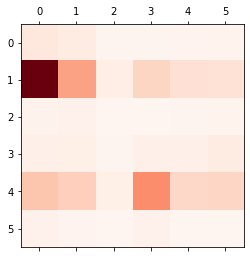

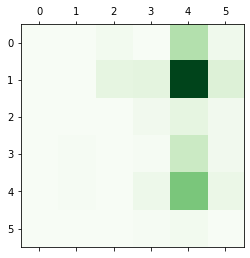

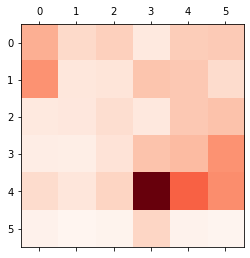

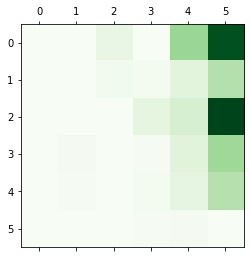

In [59]:
"""分析袖子裤子长度搭配"""

print(count[8])#找出所有衣服的袖子的长度
print(len(count[8]))
print(count[9])#找出所有裤子的长度
print(len(count[9]))
print(count[11])#找出所有裙子的长度
print(len(count[11]))

sleeves_lengths = ['超长袖','长袖','七分袖','中袖','短袖','无袖','不可见']
pants_lengths = ['长裤','九分裤','七分裤','五分裤','短裤','超短裤',
                '超长裙','长裙','中长裙','中裙','短裙','超短裙','不可见']

real_pants = ['休闲裤', '牛仔裤', '西裤', '短裤', '打底裤', '阔腿裤', '连体裤', '皮裤']
skirts = [ '半身裙', '皮裙']


sleeves_length = []
pants_length = []


for data in new_data:
    if (data[-4] in clothes):
        sleeves_length.append(sleeves_lengths.index(data[8]))
    elif (data[-4] in real_pants):
        pants_length.append(pants_lengths.index(data[9]))
    elif (data[-4] in skirts):
        pants_length.append(pants_lengths.index(data[11]))
                
assert (len(sleeves_length)==len(pants_length))
print(len(sleeves_length))
print(len(pants_length))

sleeves_numbers = [555,5064,425,1120,2776,1066,209]
pants_numbers = [3448,4246,528,957,710,978,31,1301,1841,2505,4523,308,348+706]

#数量
length_matrix = np.zeros((len(sleeves_lengths),len(pants_lengths)),dtype = np.float32)
for i in range(len(sleeves_length)):
    length_matrix[sleeves_length[i]][pants_length[i]] += 1
print(length_matrix)

plt.matshow(length_matrix[:6,0:6],cmap=plt.cm.Reds)
plt.matshow(length_matrix[:6,6:12],cmap=plt.cm.Greens)

#契合度
length_matrix2 = np.zeros((len(sleeves_lengths),len(pants_lengths)),dtype = np.float32)
for i in range(len(sleeves_length)):
    length_matrix2[sleeves_length[i]][pants_length[i]] += 1/(sleeves_numbers[sleeves_length[i]]*pants_numbers[pants_length[i]])
print(length_matrix2)

plt.matshow(length_matrix2[:6,0:6],cmap=plt.cm.Reds)
plt.matshow(length_matrix2[:6,6:12],cmap=plt.cm.Greens)
plt.show()

5601
[[8.490e+02 2.700e+02 7.800e+01 2.200e+01 1.900e+01 1.900e+01 2.000e+00
  9.900e+01 1.300e+01 3.400e+01 5.000e+00 4.000e+00 5.000e+00 0.000e+00
  1.000e+00 4.000e+00 2.000e+00]
 [7.700e+01 5.700e+01 1.060e+02 9.000e+00 4.000e+00 1.000e+00 1.800e+01
  1.100e+01 1.000e+00 3.000e+00 1.100e+01 3.000e+00 1.000e+00 0.000e+00
  3.000e+00 3.000e+00 2.000e+00]
 [4.810e+02 7.300e+01 1.097e+03 6.000e+00 0.000e+00 0.000e+00 6.800e+01
  1.000e+00 0.000e+00 0.000e+00 1.060e+02 0.000e+00 2.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00]
 [1.220e+02 9.000e+00 1.100e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [7.510e+02 3.240e+02 3.390e+02 4.700e+01 2.600e+01 2.200e+01 3.400e+01
  8.600e+01 1.100e+01 2.400e+01 2.700e+01 1.200e+01 7.000e+00 1.000e+00
  3.000e+00 8.000e+00 0.000e+00]
 [4.300e+01 7.000e+00 3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e

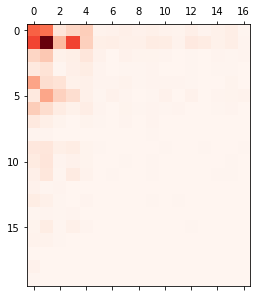

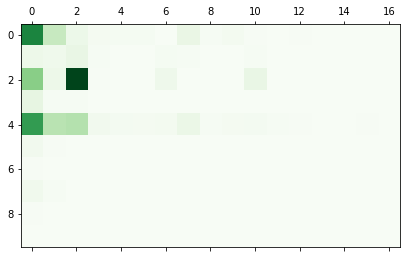

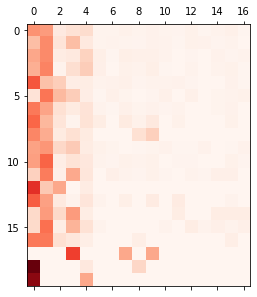

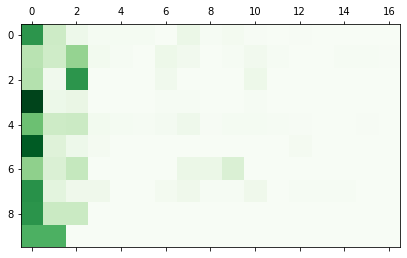

"\nclothes\n0.卫衣\n1.T恤\n2.针织衫\n3.毛衣\n4.夹克\n5.衬衫\n6.羽绒服\n7.棉衣\n8.毛呢外套\n9.Polo衫\n10.打底衫\n11.雪纺衫(蕾丝衫)\n12.西服(西装)\n13.大衣(风衣)\n14.抹胸\n15.背心(吊带)\n16.马甲\n17.皮草\n18.皮衣\n19.披肩(斗篷\n\n\npants\n0.休闲裤\n1.半身裙\n2.牛仔裤\n3.西裤\n4.短裤\n5.打底裤\n6.皮裙\n7.阔腿裤\n8.连体裤\n9.皮裤\n\n0.灰\n1.黑\n2.白\n3.蓝\n4.蓝绿\n5.紫\n6.紫红\n7.卡其\n8.红\n9.蓝紫\n10.绿\n11.橙红\n12.橙黄\n13.橙\n14.黄绿\n15.黄\n16.''\n\n"

In [61]:
"""分析衣服裤子颜色比例"""



clothes_kind = []
clothes_color = []
pants_kind = []
pants_color = []


for data in new_data:
    if (data[-4] in clothes):
        clothes_kind.append(clothes.index(data[-4]))
        clothes_color.append(colors.index(data[-1]))
    elif (data[-4] in pants):
        pants_kind.append(pants.index(data[-4]))
        pants_color.append(colors.index(data[-1]))
        

#数量
clothes_kinds_color_matrix = np.zeros((len(clothes),len(colors)),dtype = np.float32)
pants_kinds_color_matrix = np.zeros((len(pants),len(colors)),dtype = np.float32)
for i in range(len(clothes_kind)):
    clothes_kinds_color_matrix[clothes_kind[i]][clothes_color[i]]+=1
    pants_kinds_color_matrix[pants_kind[i]][pants_color[i]]+=1
    
assert (len(clothes_kind)==len(pants_kind))
print(len(clothes_kind))
  
print(pants_kinds_color_matrix)
print(clothes_kinds_color_matrix)
print()

plt.matshow(clothes_kinds_color_matrix,cmap=plt.cm.Reds)
plt.matshow(pants_kinds_color_matrix,cmap=plt.cm.Greens)


#比例
clothes_kinds_color_matrix2 = np.zeros((len(clothes),len(colors)),dtype = np.float32)
pants_kinds_color_matrix2 = np.zeros((len(pants),len(colors)),dtype = np.float32)
for i in range(len(clothes_kind)):
    clothes_kinds_color_matrix2[clothes_kind[i]][clothes_color[i]]+=1/(count[-4][clothes[clothes_kind[i]]])
    pants_kinds_color_matrix2[pants_kind[i]][pants_color[i]]+=1/(count[-4][pants[pants_kind[i]]])
    
assert (len(clothes_kind)==len(pants_kind))
print(len(clothes_kind))
  
print(pants_kinds_color_matrix2)
print(clothes_kinds_color_matrix2)
print()



plt.matshow(clothes_kinds_color_matrix2,cmap=plt.cm.Reds)
plt.matshow(pants_kinds_color_matrix2,cmap=plt.cm.Greens)
plt.show()
"""
clothes
0.卫衣
1.T恤
2.针织衫
3.毛衣
4.夹克
5.衬衫
6.羽绒服
7.棉衣
8.毛呢外套
9.Polo衫
10.打底衫
11.雪纺衫(蕾丝衫)
12.西服(西装)
13.大衣(风衣)
14.抹胸
15.背心(吊带)
16.马甲
17.皮草
18.皮衣
19.披肩(斗篷


pants
0.休闲裤
1.半身裙
2.牛仔裤
3.西裤
4.短裤
5.打底裤
6.皮裙
7.阔腿裤
8.连体裤
9.皮裤

0.灰
1.黑
2.白
3.蓝
4.蓝绿
5.紫
6.紫红
7.卡其
8.红
9.蓝紫
10.绿
11.橙红
12.橙黄
13.橙
14.黄绿
15.黄
16.''

"""

{' 无图案': 7294, ' 文字 卡通动漫': 97, ' 文字 艺术效果': 167, ' 文字 运动 艺术效果': 3, ' 文字': 2605, ' 图形 文字': 164, ' 植物花卉': 79, ' 艺术效果': 278, ' 卡通动漫': 74, ' 图形': 94, ' 植物花卉 卡通动漫': 3, ' 文字 生活 艺术效果': 35, ' 植物花卉 文字': 19, ' 动物 文字 艺术效果': 21, ' 图形 艺术效果': 5, ' 文字 人体结构 艺术效果': 3, ' 文字 人物': 14, ' 文字 人物 艺术效果': 23, ' 人体结构': 2, ' 动物 图形 文字 卡通动漫': 2, ' 动物 文字': 28, ' 图形 卡通动漫': 5, ' 文字 生活': 18, ' 文字 人体结构': 6, ' 动物 生活 卡通动漫': 1, ' 动物': 20, ' 图形 文字 卡通动漫': 3, ' 生活': 9, ' 文字 人物 生活': 2, ' 图形 星型 太空科技 艺术效果': 1, ' 文字 人体结构 卡通动漫': 1, ' 图形 文字 生活': 3, ' 文字 人物 生活 艺术效果': 2, ' 生活 卡通动漫': 2, ' 人物': 9, ' 文字 运动': 2, ' 生活 艺术效果': 4, ' 植物花卉 文字 艺术效果': 10, ' 图形 文字 艺术效果': 9, ' 艺术效果 卡通动漫': 2, ' 图形 星型 文字': 1, ' 文字 太空科技 艺术效果': 4, ' 植物花卉 图形 文字': 2, ' 图形 文字 生活 艺术效果': 2, ' 文字 生活 卡通动漫': 5, ' 文字 艺术效果 卡通动漫': 10, ' 文字 自然 艺术效果': 5, ' 文字 自然': 4, ' 太空科技 艺术效果': 2, ' 动物 艺术效果': 9, ' 图形 星型 文字 太空科技 艺术效果': 1, ' 文字 太空科技': 2, ' 动物 文字 卡通动漫': 5, ' 人物 艺术效果': 4, ' 植物花卉 文字 生活 艺术效果': 2, ' 动物 文字 生活': 1, ' 植物花卉 文字 人体结构 艺术效果': 1, ' 动物 图形 文字': 2, ' 自然 艺术效果': 2, ' 太空科技 卡通动漫': 1, 

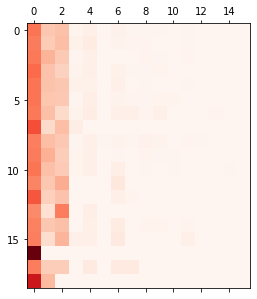

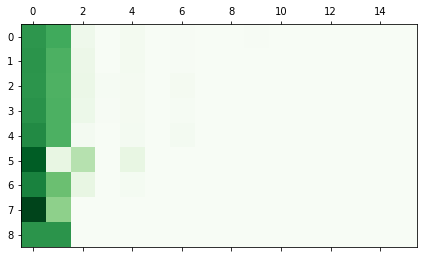

'\n0.未知\n1.无图案\n2.图形\n3.文字\n4.卡通动漫\n5.艺术效果\n6.生活\n7.植物花卉\n8.人物\n9.动物\n10.太空科技\n11.人体结构\n12.自然\n13.星型\n14.运动\n15.心形\n\nclothes\n0.卫衣\n1.T恤\n2.针织衫\n3.毛衣\n4.夹克\n5.衬衫\n6.羽绒服\n7.棉衣\n8.毛呢外套\n9.Polo衫\n10.打底衫\n11.雪纺衫(蕾丝衫)\n12.西服(西装)\n13.大衣(风衣)\n14.抹胸\n15.背心(吊带)\n16.马甲\n17.皮草\n18.皮衣\n19.披肩(斗篷\n\n\npants\n0.休闲裤\n1.半身裙\n2.牛仔裤\n3.西裤\n4.短裤\n5.打底裤\n6.皮裙\n7.阔腿裤\n8.连体裤\n9.皮裤\n'

In [46]:
"""找出衣服种类与图案的关系"""
print(count[2])#所有图案
print(count[-4])#统计每种衣服对应的数量，方便统计频率

patterns = []
for i in count[2]:
    ii = i.split(' ')
    for iii in ii:
        if iii not in patterns:
            patterns.append(iii)
print(patterns)


clothes_kind = []
clothes_pattern = [] 
pants_kind = []
pants_pattern = []


for data in new_data:
    if (data[-4] in clothes):
        clothes_kind.append(clothes.index(data[-4]))
        for i in data[2].split(' '):
            clothes_pattern.append(patterns.index(i))
    elif (data[-4] in pants):
        pants_kind.append(pants.index(data[-4]))
        for i in data[2].split(' '):
            pants_pattern.append(patterns.index(i))
        
assert (len(clothes_kind)==len(pants_kind))
print(len(clothes_kind))

clothes_kinds_pattern_matrix = np.zeros((len(clothes),len(patterns)),dtype = np.float32)
pants_kinds_pattern_matrix = np.zeros((len(pants),len(patterns)),dtype = np.float32)

for i in range(len(clothes_kind)):
    clothes_kinds_pattern_matrix[clothes_kind[i]][clothes_pattern[i]] += 1/(count[-4][clothes[clothes_kind[i]]])#除以每个类型衣服数量得到比例
    pants_kinds_pattern_matrix[pants_kind[i]][pants_pattern[i]] += 1/(count[-4][pants[pants_kind[i]]])
    

print(pants_kinds_pattern_matrix)
print(clothes_kinds_pattern_matrix)
print()


plt.matshow(clothes_kinds_pattern_matrix[1:],cmap=plt.cm.Reds)
plt.matshow(pants_kinds_pattern_matrix[1:],cmap=plt.cm.Greens)
plt.show()

"""
0.未知
1.无图案
2.图形
3.文字
4.卡通动漫
5.艺术效果
6.生活
7.植物花卉
8.人物
9.动物
10.太空科技
11.人体结构
12.自然
13.星型
14.运动
15.心形

clothes
0.卫衣
1.T恤
2.针织衫
3.毛衣
4.夹克
5.衬衫
6.羽绒服
7.棉衣
8.毛呢外套
9.Polo衫
10.打底衫
11.雪纺衫(蕾丝衫)
12.西服(西装)
13.大衣(风衣)
14.抹胸
15.背心(吊带)
16.马甲
17.皮草
18.皮衣
19.披肩(斗篷


pants
0.休闲裤
1.半身裙
2.牛仔裤
3.西裤
4.短裤
5.打底裤
6.皮裙
7.阔腿裤
8.连体裤
9.皮裤
"""

In [21]:
#不同种类裤子自身长短分类比例 牛仔裤是否修身 卫衣是否宽松